In [14]:
# 載入資料集
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# 選用k-最近鄰模型與超參數
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

# 訓練模型
model.fit(X, y)
y_model = model.predict(X)

# 計算準確度
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

In [15]:
# 切割50% 的資料 作為訓練集
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)

# 使用其中一組訓練模型
model.fit(X1, y1)

# 使用另外一組資料評估模型
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

In [16]:
# 以上面的資料集進行交叉驗證
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

In [17]:
# 使用 cross_val_score() 進行5折交叉驗證
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, X, y, cv=5)

# 得到5個accuracy score 的陣列
print(score)

# 取平均
print(score.mean())

[0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
0.96


In [18]:
# 使用留一交叉驗證
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())

# 結果只有對跟不對兩種
print(scores)

# 取平均
print(score.mean())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
0.96


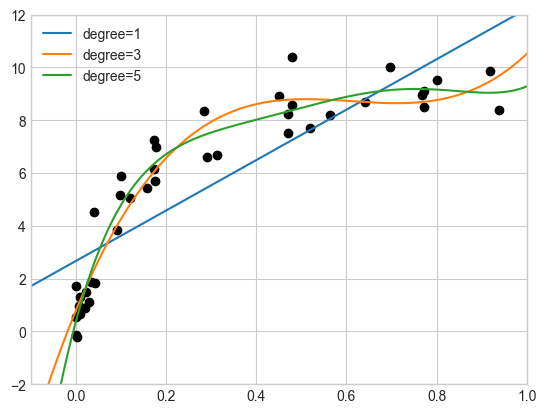

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import numpy as np

# 定義多項式迴歸函式
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

# 建立擬合資料 y為非線性計算出的結果 可選擇加入高斯噪音
def make_data(N, err=1.0, rseed=1):
    rng=np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() +0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

# 視覺化不同degree 的多項式模型
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
X_test = np.linspace(-0.1, 1.1, 500)[:,None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');


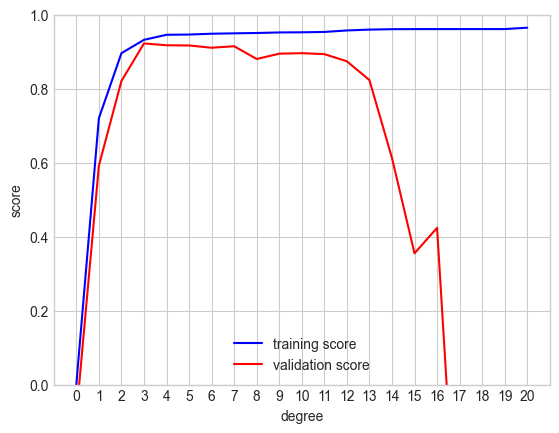

In [20]:
# 使用 validation_curve 驗證不同階數的模型效能
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(
    PolynomialRegression(), X, y,
    param_name='polynomialfeatures__degree',
    param_range=degree, cv=7
)

plt.plot(degree, np.median(train_score, 1),
         color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1),
         color='red', label='validation score')

plt.legend(loc='best')
x_range = list(range(0,21))
plt.ylim(0, 1)
plt.xticks(x_range)
plt.xlabel('degree')
plt.ylabel('score');

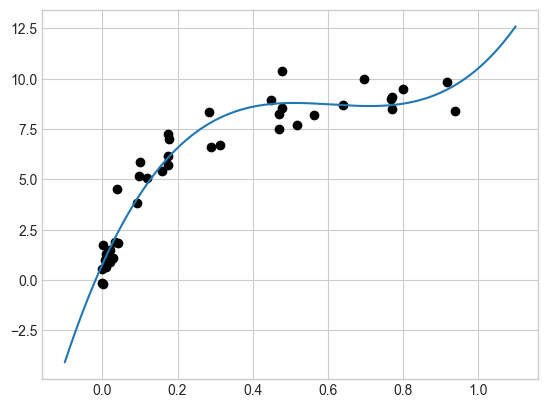

In [21]:
# 畫出最佳解模型 三階多項式
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);

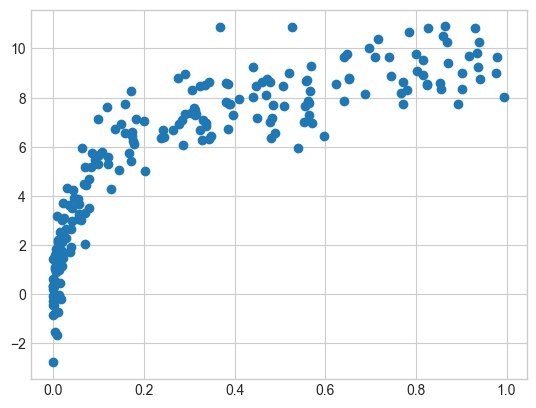

In [22]:
# 產生新的資料集 包含先前五倍的資料量
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

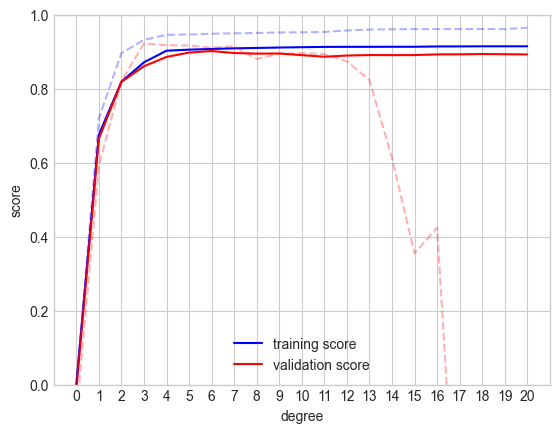

In [23]:
# 用新的資料集與先前的資料 比較驗證曲線
degree = np.arange(21)
train_score2, val_score2 = validation_curve(
    PolynomialRegression(), X2, y2,
    param_name='polynomialfeatures__degree',
    param_range=degree, cv=7)

plt.plot(degree, np.median(train_score2, 1),
         color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1),
         color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1),
         color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1),
         color='red', alpha=0.3, linestyle='dashed')

plt.legend(loc='lower center')
x_range = list(range(0,21))
plt.ylim(0, 1)
plt.xticks(x_range)
plt.xlabel('degree')
plt.ylabel('score');

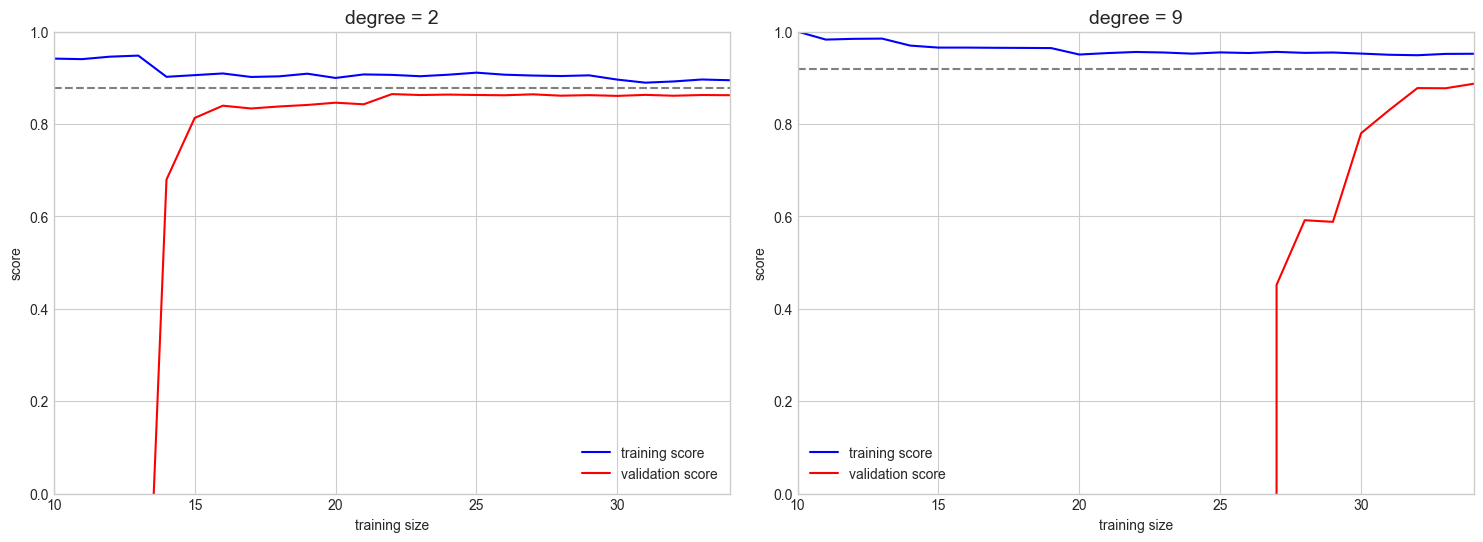

In [28]:
# 使用degree 2 和 9 來計算學習曲線
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(
        PolynomialRegression(degree), X, y, cv=7,
        train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1),
               color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1),
               color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0],
                 N[-1], color='gray', linestyle='dashed')
    
    ax[i].set_ylim(0,1)
    ax[i].set_xlim(N[0],N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

In [30]:
# 一次配對多項式階數與 是否需要截距
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept':[True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

# 格狀搜尋需要放資料才能進行
grid.fit(X,y)

# 詢問最佳參數
print(grid.best_params_)

{'linearregression__fit_intercept': False, 'polynomialfeatures__degree': np.int64(4)}


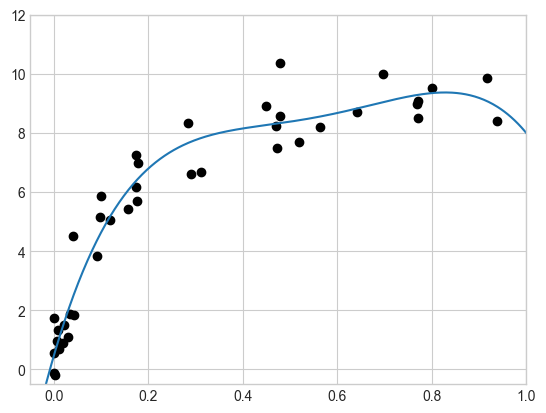

In [49]:
# 視覺化上述結果
model = grid.best_estimator_

plt.scatter(X.ravel(), y,color='black')
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis([-0.05,1,-0.5,12]);
